In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Dataset Link - https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment**

In [ ]:
df = pd.read_csv("Tweets.csv")
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


from matplotlib import pyplot as plt
_df_0['tweet_id'].plot(kind='hist', bins=20, title='tweet_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['airline_sentiment_confidence'].plot(kind='hist', bins=20, title='airline_sentiment_confidence')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['negativereason_confidence'].plot(kind='hist', bins=20, title='negativereason_confidence')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['retweet_count'].plot(kind='hist', bins=20, title='retweet_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='tweet_id', y='airline_sentiment_confidence', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='airline_sentiment_confidence', y='negativereason_confidence', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='negativereason_confidence', y='retweet_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['tweet_id'].plot(kind='line', figsize=(8, 4), title='tweet_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['airline_sentiment_confidence'].plot(kind='line', figsize=(8, 4), title='airline_sentiment_confidence')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['negativereason_confidence'].plot(kind='line', figsize=(8, 4), title='negativereason_confidence')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['retweet_count'].plot(kind='line', figsize=(8, 4), title='retweet_count')
plt.gca().spines[['top', 'right']].set_visible(False)

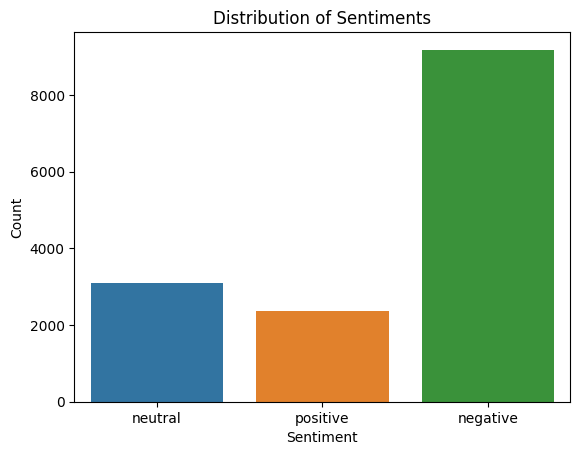

In [ ]:
sns.countplot(x='airline_sentiment', data=df)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

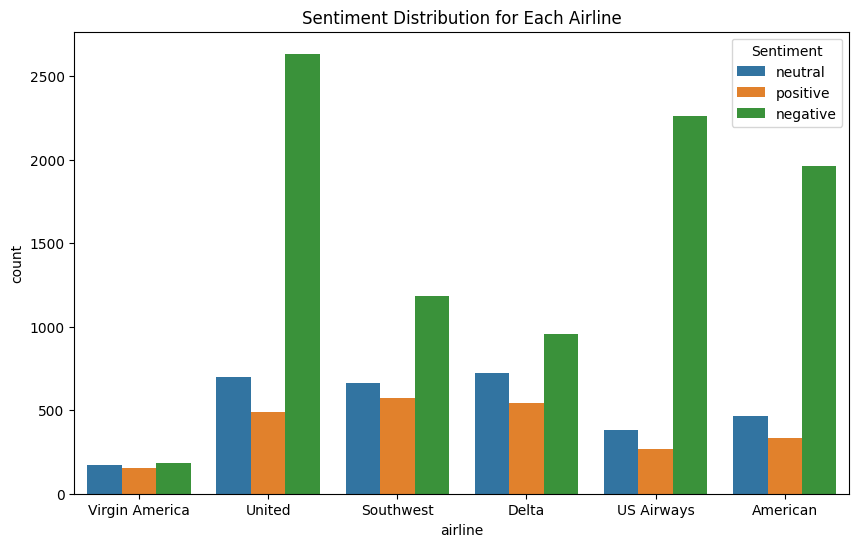

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='airline', hue='airline_sentiment', data=df)
plt.title('Sentiment Distribution for Each Airline')
plt.legend(title='Sentiment')
plt.show()

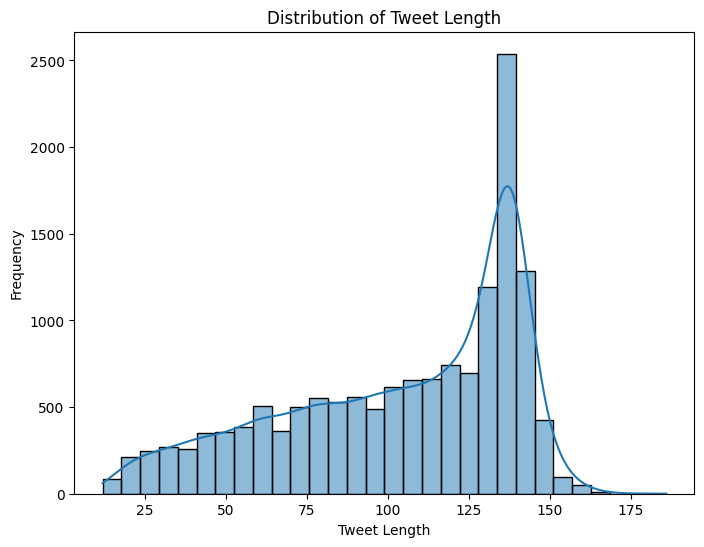

In [ ]:
df['tweet_length'] = df['text'].apply(len)
plt.figure(figsize=(8, 6))
sns.histplot(df['tweet_length'], bins=30, kde=True)
plt.title('Distribution of Tweet Length')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()

<ipython-input-6-c26f93cdb93b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


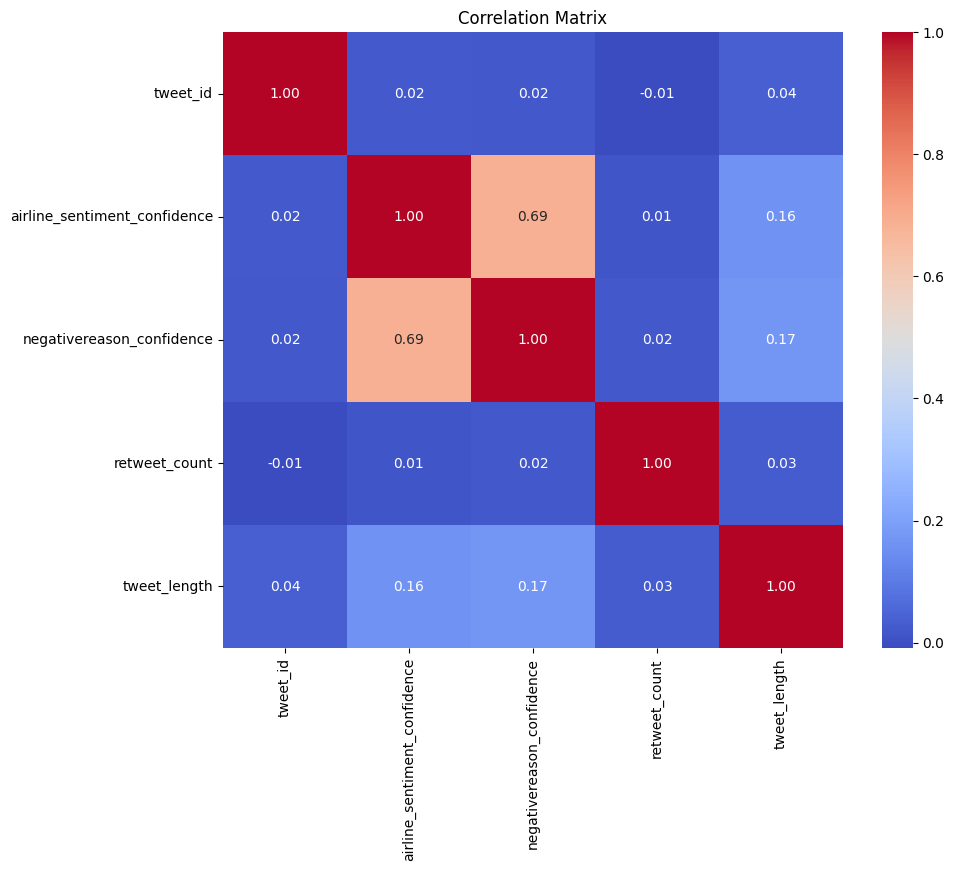

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Drop non-numeric columns for PCA
numeric_cols = ['airline_sentiment_confidence', 'negativereason_confidence', 'retweet_count', 'tweet_length']
X_numeric = df[numeric_cols]

# Handling missing values
X_numeric = df[numeric_cols].copy()  # Create a copy of the numeric columns
X_numeric.fillna(X_numeric.mean(), inplace=True)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

# Find number of components to explain 96% of the variance
n_components_96 = sum(cumulative_variance_ratio < 0.96) + 1

print("Number of components to explain 96% of the variance:", n_components_96)
print("Explained variance ratios:", explained_variance_ratio)

Number of components to explain 96% of the variance: 4
Explained variance ratios: [0.41688621 0.25124133 0.23285986 0.09901261]


In [ ]:
features = df['text'].values
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature)

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [ ]:
vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

**The previous two code blocks for cleaning the dataset and performing TF-IDF are the only parts of the entire code that have been taken from an external online resource. Resource Link: https://github.com/Rhishikesh1997/sentiment-analysis-on-airline-tweets/blob/master/sentiment%20analysis%20on%20airline%20tweets.ipynb**

In [ ]:
y = df['airline_sentiment']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(processed_features, y, test_size=0.2)

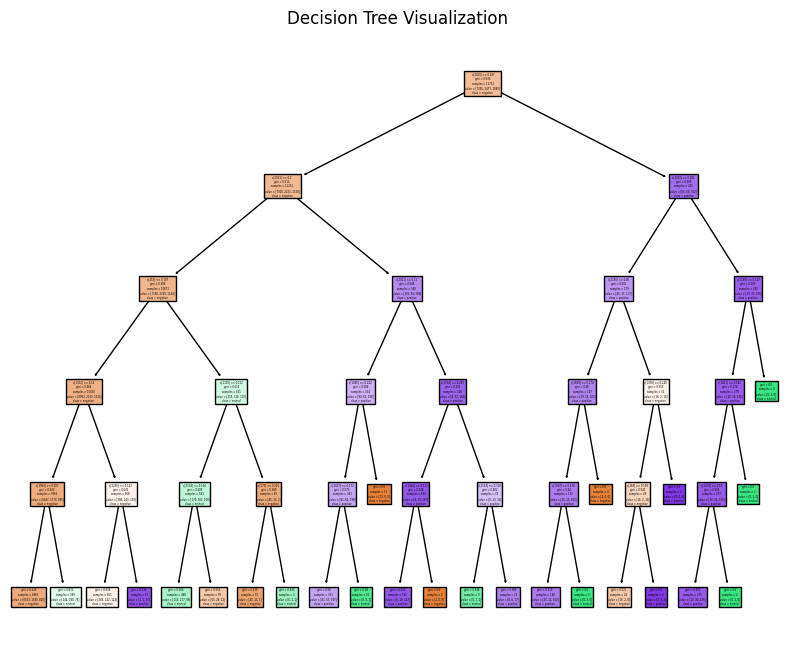

In [ ]:
# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(max_depth=5)

# Fit the classifier on the training data
dt_classifier.fit(X_train, y_train)

# Visualize the Decision Tree
plt.figure(figsize=(10, 8))
plot_tree(dt_classifier, class_names=dt_classifier.classes_, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

In [ ]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
ada_classifier = AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)
mlp_classifier = MLPClassifier(max_iter=500)
mlp_classifier.fit(X_train, y_train)

MLPClassifier(max_iter=500)

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_rf_classifier = grid_search.best_estimator_

In [ ]:
mlp_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['relu', 'tanh', 'identity']
}
mlp_grid_search = GridSearchCV(estimator=MLPClassifier(max_iter=1000), param_grid=mlp_param_grid, cv=5)
mlp_grid_search.fit(X_train, y_train)
best_mlp_classifier = mlp_grid_search.best_estimator_

In [ ]:
models = {
    'Random Forest': rf_classifier,
    'Random Forest (With Grid Search)': best_rf_classifier,
    'AdaBoost': ada_classifier,
    'Gradient Boosting': gb_classifier,
    'MLP': mlp_classifier,
    'MLP (With Grid Search)': best_mlp_classifier
}
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.3f}")

Random Forest Accuracy: 0.748
Random Forest (With Grid Search) Accuracy: 0.748
AdaBoost Accuracy: 0.714
Gradient Boosting Accuracy: 0.728
MLP Accuracy: 0.734
MLP (With Grid Search) Accuracy: 0.752


In [ ]:
for name, model in models.items():
    scores = cross_val_score(model, processed_features, y, cv=5, scoring='accuracy')
    print(f"{name} Cross-Validation Accuracy: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})")

Random Forest Cross-Validation Accuracy: 0.686 (+/- 0.118)
Random Forest (With Grid Search) Cross-Validation Accuracy: 0.692 (+/- 0.106)
AdaBoost Cross-Validation Accuracy: 0.660 (+/- 0.121)
Gradient Boosting Cross-Validation Accuracy: 0.664 (+/- 0.161)
MLP Cross-Validation Accuracy: 0.696 (+/- 0.121)
MLP (With Grid Search) Cross-Validation Accuracy: 0.711 (+/- 0.104)


In [ ]:
y_pred = best_rf_classifier.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))

Random Forest Classification Report:
              precision    recall  f1-score   support

    negative       0.77      0.92      0.84      1823
     neutral       0.65      0.40      0.50       622
    positive       0.70      0.53      0.60       483

    accuracy                           0.75      2928
   macro avg       0.71      0.62      0.65      2928
weighted avg       0.73      0.75      0.73      2928



In [ ]:
y_pred = best_mlp_classifier.predict(X_test)
print("MLP Classification Report:")
print(classification_report(y_test, y_pred))

MLP Classification Report:
              precision    recall  f1-score   support

    negative       0.83      0.86      0.85      1823
     neutral       0.58      0.55      0.56       622
    positive       0.66      0.60      0.62       483

    accuracy                           0.75      2928
   macro avg       0.69      0.67      0.68      2928
weighted avg       0.75      0.75      0.75      2928

